# <span style= "color: #FF0000;">🌡**Chennai Temperature Forecasting**</span>

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Project Domain : Meteorology__

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

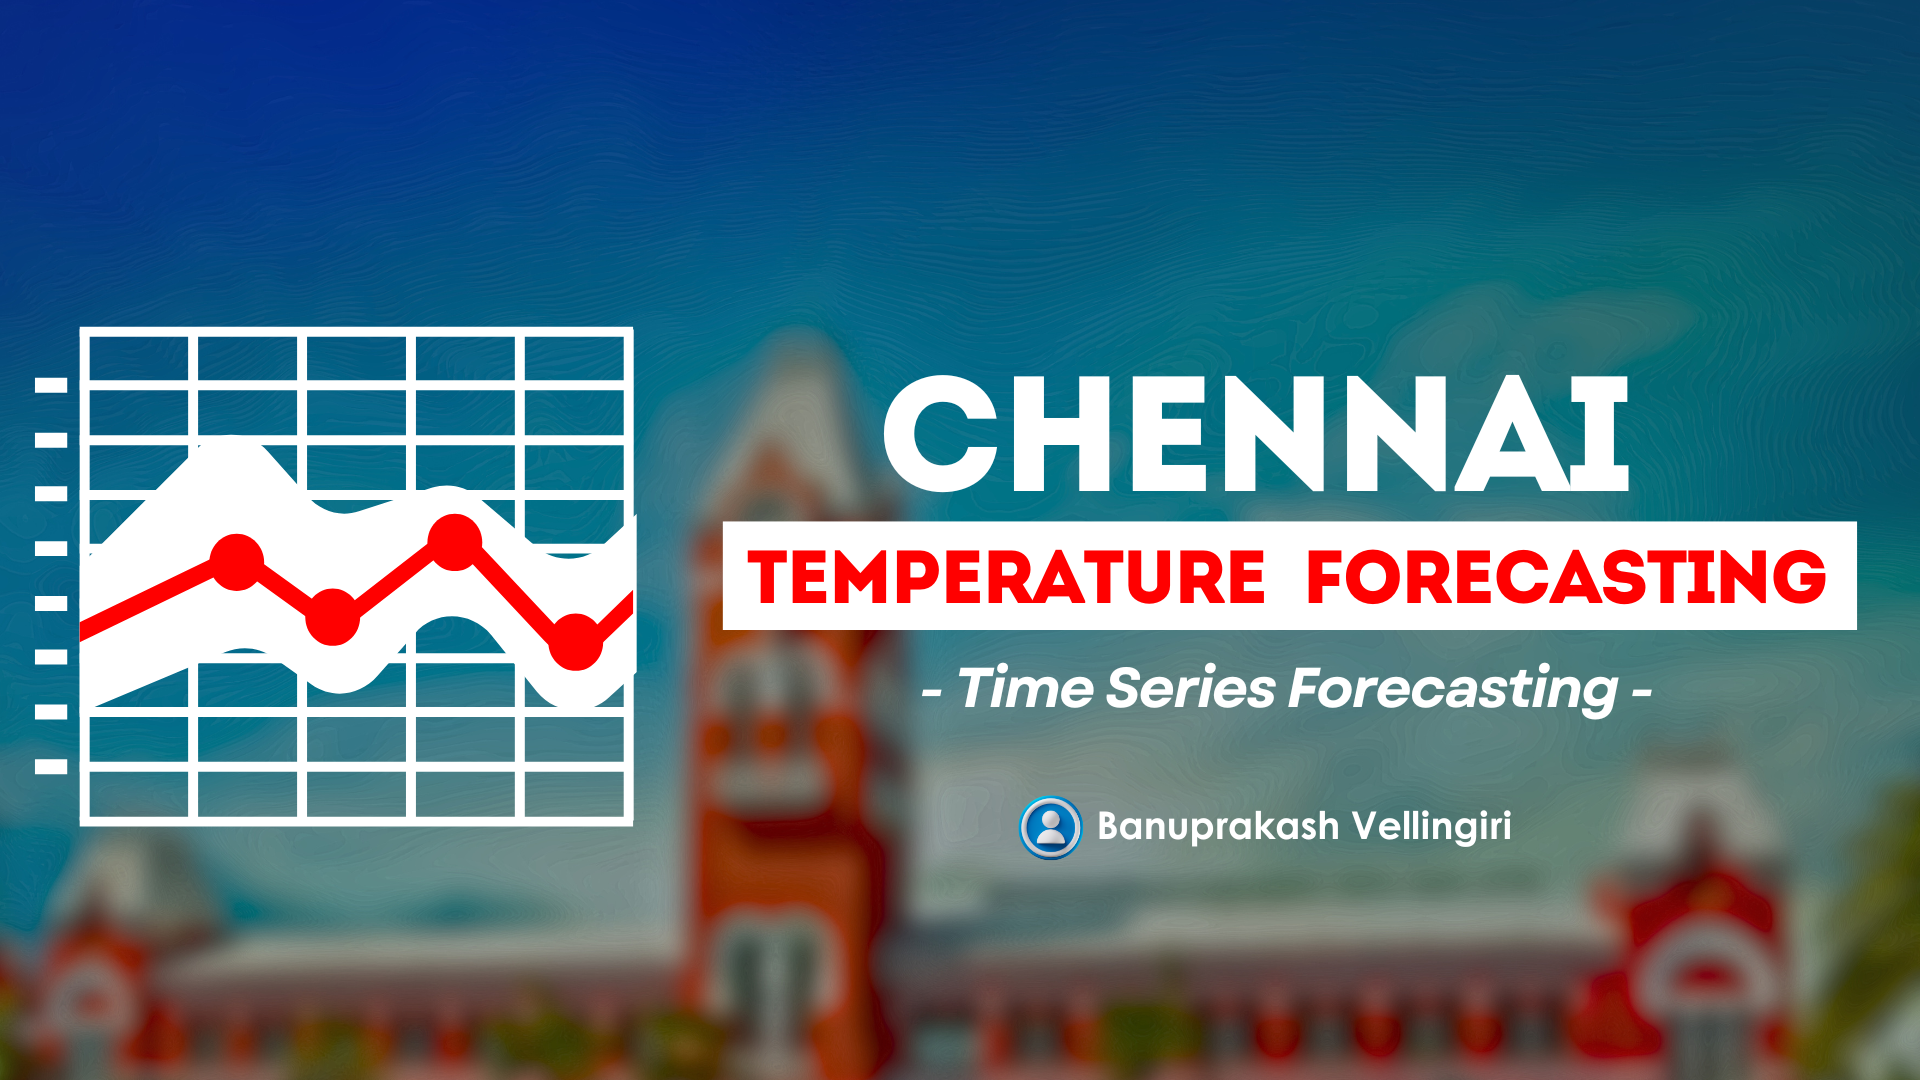

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __Problem Statement and Goal:__
- The objective of this project is to develop a robust predictive model capable of accurately forecasting the temperature in Chennai, India, using historical temperature data. 
- Specifically, the aim is to leverage advanced deep learning techniques for univariate time series forecasting.
-  With the help of  historical temperature data collected over a specific period, The model is trained on this dataset to learn the patterns, trends, and seasonal variations present in the temperature data.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __About Data:__

- The temperature data is sourced from the India Meteorological Department (IMD), the national agency responsible for meteorological observations, weather forecasting, and seismology in India.

`credits:` [IMD Pune](https://www.imdpune.gov.in)
- Recent temperature data has been collected manually from open-source websites, supplementing the information provided by the India Meteorological Department (IMD).

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### __1. Loading the Data:__


In [1]:
#Import necessary libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Chennai_temp_data_1951_2024.csv")
#---------------------------------------------------
print("Shape of the dataset:",data.shape)
data.head(3)

Shape of the dataset: (26807, 4)


,date,min_temperature_(celcius),max_temperature_(celcius),avg_temperature_(celcius)
0,1951-01-01,20.25,29.01,24.630
1,1951-01-02,19.97,28.50,24.235
2,1951-01-03,18.68,28.67,23.675


In [3]:
data.tail(3)

,date,min_temperature_(celcius),max_temperature_(celcius),avg_temperature_(celcius)
26804,2024-05-21,28.33,35.00,31.665
26805,2024-05-22,28.33,35.00,31.665
26806,2024-05-23,28.33,36.11,32.220


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __1.1. Column Description:__

| Column                        | Description                                                                            |
|-------------------------------|----------------------------------------------------------------------------------------|
| **date**                      | The date on which the temperature measurements were recorded (format: YYYY-MM-DD).      |
| **min_temperature_(celcius)** | The minimum temperature recorded on the specified date, measured in degrees Celsius.    |
| **max_temperature_(celcius)** | The maximum temperature recorded on the specified date, measured in degrees Celsius.    |
| **avg_temperature_(celcius)** | The average temperature calculated for the specified date, measured in degrees Celsius. |



 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__Observations :__

- The dataset contains daily records of the minimum, maximum, and average temperatures of Chennai spanning from January 1st, 1951, to May 23rd, 2024.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### __1.2. Checking for Errors and Duplicates in the dataset:__

In [4]:
#Checking for duplicates
print("1. Duplicated Rows: ",data.duplicated().sum())
#--------------------------------------------------------------------
#Checking for NaN values
print("2. Null Values:")
pd.DataFrame(data.isna().sum()).T

1. Duplicated Rows:  0
2. Null Values:


,date,min_temperature_(celcius),max_temperature_(celcius),avg_temperature_(celcius)
0,0,0,0,0


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 __Data Quality Assessment:__

- The data is free from null values and duplicates.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### __2. Filtering the Required columns:__
- Taking only "date" and "avg_temperature_(celcius)".

In [5]:
df_avg=data[["date","avg_temperature_(celcius)"]]

In [6]:
#Setting the date column as index
df_avg.set_index("date",inplace=True)
df_avg.head(3)

,avg_temperature_(celcius)
date,
1951-01-01,24.630
1951-01-02,24.235
1951-01-03,23.675


In [7]:
df_avg.describe()

,avg_temperature_(celcius)
count,26807.000000
mean,28.810934
std,2.902972
min,21.570000
25%,26.370000
50%,29.085000
75%,30.998300
max,37.515000


### __3. Data Visualization:__


In [8]:
#Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

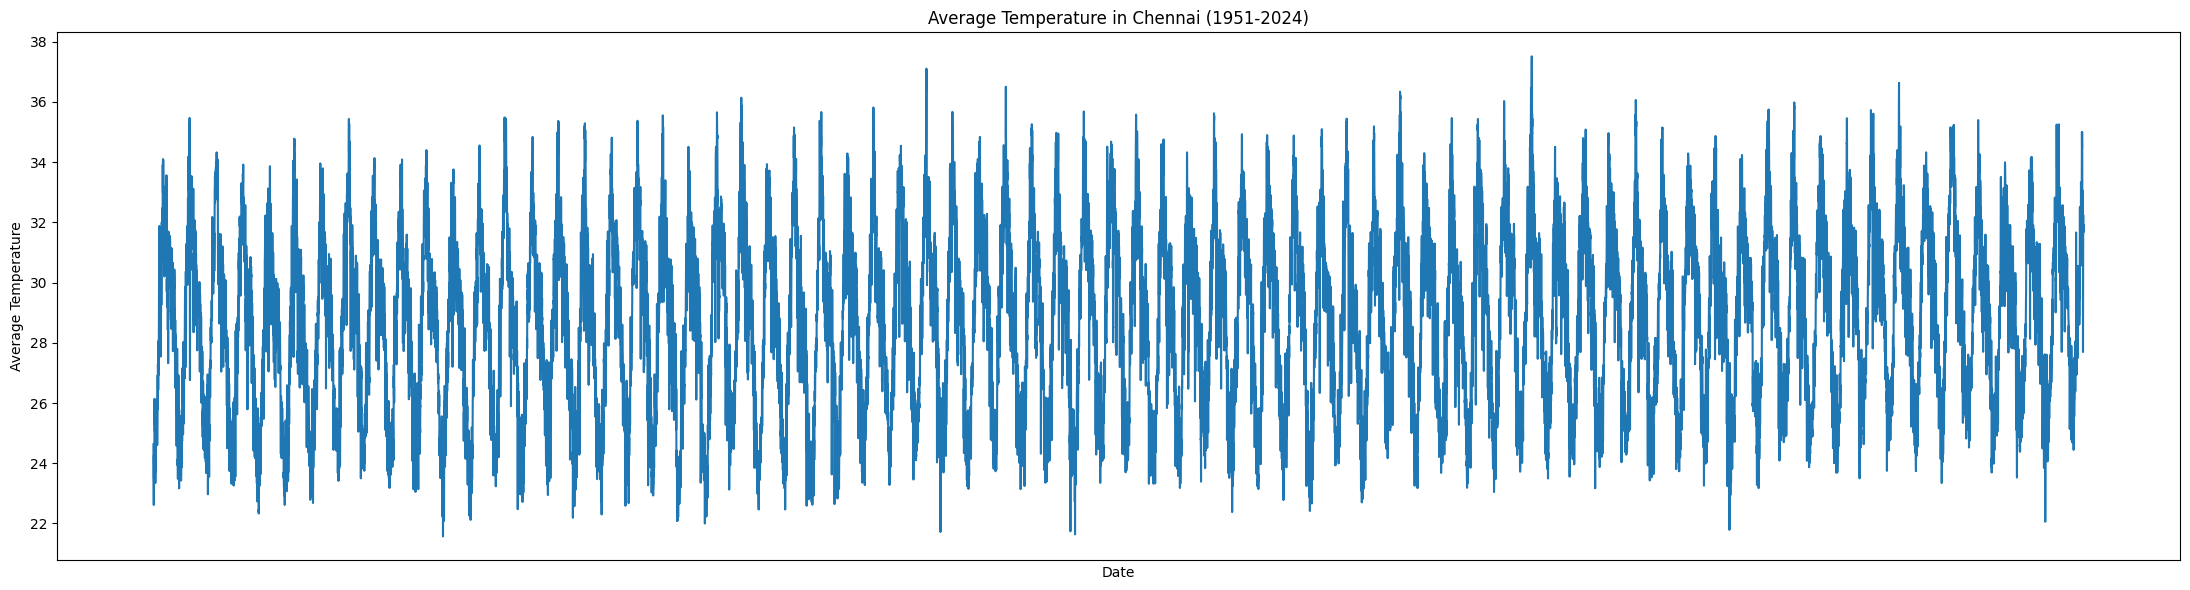

In [9]:
#Lineplot
plt.figure(figsize=(22, 6))
plt.plot(df_avg.index, df_avg['avg_temperature_(celcius)'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Average Temperature in Chennai (1951-2024)')
plt.xticks([])
plt.tight_layout()
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 __Observations:__

- The noticeable recurring patterns or fluctuations in the plot indicate that the average temperature data follows a seasonal trend over a time.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 ### __4. Deep Learning Model:__

- Using Bidirectional LSTM Model for Forecasting Temperature

__4.1 Normalizing the Data using MinMaxScaler:__

In [21]:
#Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [22]:
mm_scaler=MinMaxScaler(feature_range=(0,1))
#--------------------------------------------------------------
#Converting the data into 1D array
scaled_data=mm_scaler.fit_transform(np.array(df_avg).reshape(-1,1))

__4.2 Creating the Sequence:__

In [23]:

def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
#------------------------------------------------------------------------------------------------------------
seq_length=365
#------------------------------------------------------------------------------------------------------------
X, y = create_sequences(scaled_data, seq_length)
#------------------------------------------------------------------------------------------------------------
print("Shape of the features:",X.shape)
print("Shape of the target:",y.shape)

Shape of the features: (26442, 365, 1)
Shape of the target: (26442, 1)


__4.3 Splitting the Data into Training and Testing Sets:__

In [37]:
#Taking first 80% data for training
train_size = int(len(X) * 0.8)
#----------------------------------------------
X_train=X[:train_size]
X_test = X[train_size:]
#----------------------------------------------
y_train= y[:train_size]
y_test = y[train_size:]
#----------------------------------------------
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (21153, 365, 1)
Shape of X_test: (5289, 365, 1)
Shape of y_train: (21153, 1)
Shape of y_test: (5289, 1)


__4.4 Bidirectional LSTM Model:__

In [38]:
#Import necessary libraries
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM, Dense,Dropout, Bidirectional
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
#Building the Bidirectional LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(seq_length, 1)))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Bidirectional(LSTM(50, activation='relu')))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(1))
#------------------------------------------------------------------------------------------------------------
bilstm_model.compile(optimizer='adam', loss='mean_squared_error')
#------------------------------------------------------------------------------------------------------------
bilstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 365, 100)       │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 365, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,301 (317.58 KB)

 Trainable params: 81,301 (317.58 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#Saving the Model
#--------------------------------------------------------------
checkpoint_filepath = 'bilstm_model_checkpoint.weights.h5'
#--------------------------------------------------------------
model_checkpoint_callback = ModelCheckpoint(
                                                filepath=checkpoint_filepath,
                                                save_weights_only=True,
                                                monitor='val_loss',
                                                mode='min',
                                                save_best_only=True
                                            )
#--------------------------------------------------------------
#Training the Model
#For compututational efficiency number of epochs=6 is taken 
history = bilstm_model.fit(X_train, y_train,epochs=6,validation_split=0.1,callbacks=[model_checkpoint_callback])


Epoch 1/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 183s 300ms/step - loss: 0.0174 - val_loss: 0.0029
Epoch 2/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 187s 314ms/step - loss: 0.0046 - val_loss: 0.0023
Epoch 3/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 185s 311ms/step - loss: 0.0035 - val_loss: 0.0023
Epoch 4/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 169s 284ms/step - loss: 0.0032 - val_loss: 0.0021
Epoch 5/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 157s 265ms/step - loss: 0.0030 - val_loss: 0.0020
Epoch 6/6
595/595 ━━━━━━━━━━━━━━━━━━━━ 156s 263ms/step - loss: 0.0027 - val_loss: 0.0020


__4.5 Performance Evaluation:__

In [41]:
#Predicting the output
y_train_pred=bilstm_model .predict(X_train)
y_test_pred=bilstm_model .predict(X_test)

662/662 ━━━━━━━━━━━━━━━━━━━━ 51s 76ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step


In [43]:
#Transforming the data into original form
y_train_transformed=mm_scaler.inverse_transform(y_train)
y_test_transformed=mm_scaler.inverse_transform(y_test)
#------------------------------------------------------------------------
y_train_pred_transformed=mm_scaler.inverse_transform(y_train_pred)
y_test_pred_transformed=mm_scaler.inverse_transform(y_test_pred)

In [44]:
#Root Mean Square Error
#----------------------------------------------------------------------------
#Train data RSME
rmse_train = np.sqrt(mean_squared_error(y_train_transformed, y_train_pred_transformed))
print('Train data RMSE:', rmse_train)
#----------------------------------------------------------------------------
#Test data RSME
rmse_test = np.sqrt(mean_squared_error(y_test_transformed, y_test_pred_transformed))
print('Test data RMSE:', rmse_test)

Train data RMSE: 0.7323403475007867
Test data RMSE: 0.7386979461053411


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 __Observations:__

- Root Mean Squared Error (RMSE) value is small(0.7), it suggests that the model's predictions are close to the actual values on average.
 
`If the model is trained for more epochs, the error can be significantly reduced.`
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

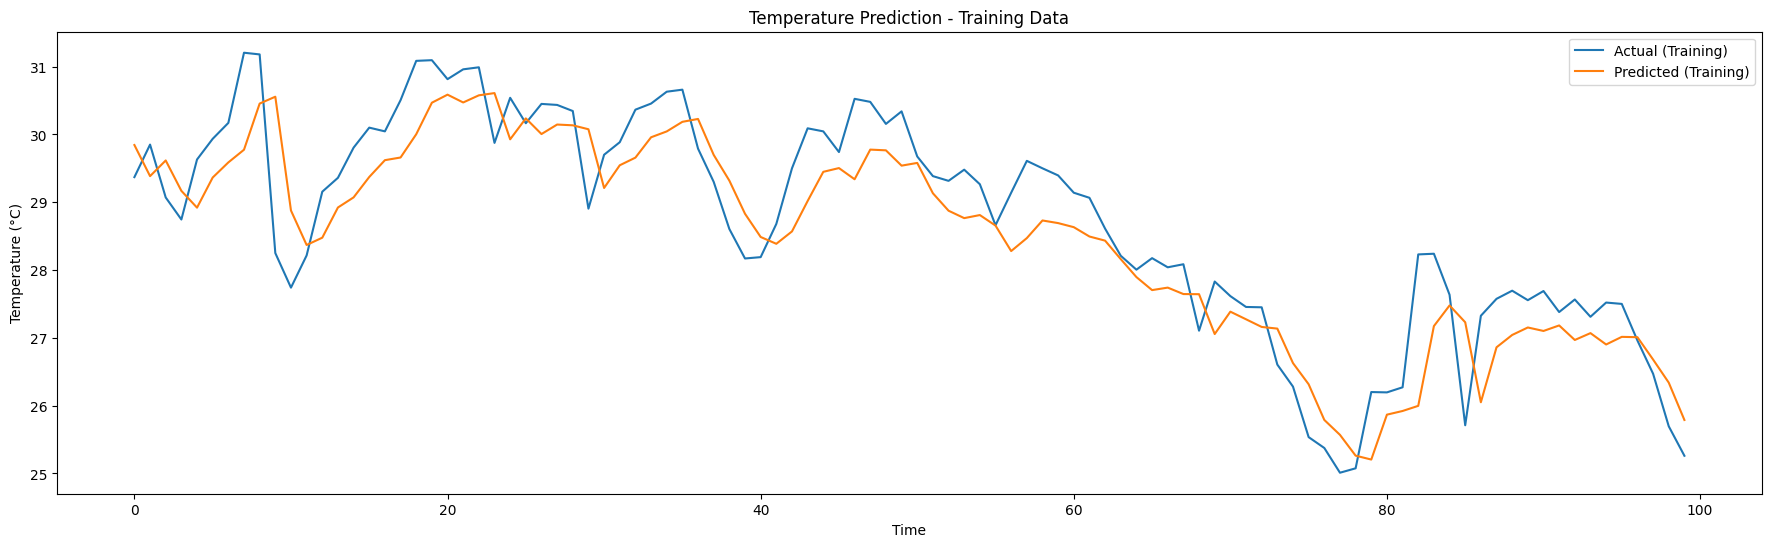

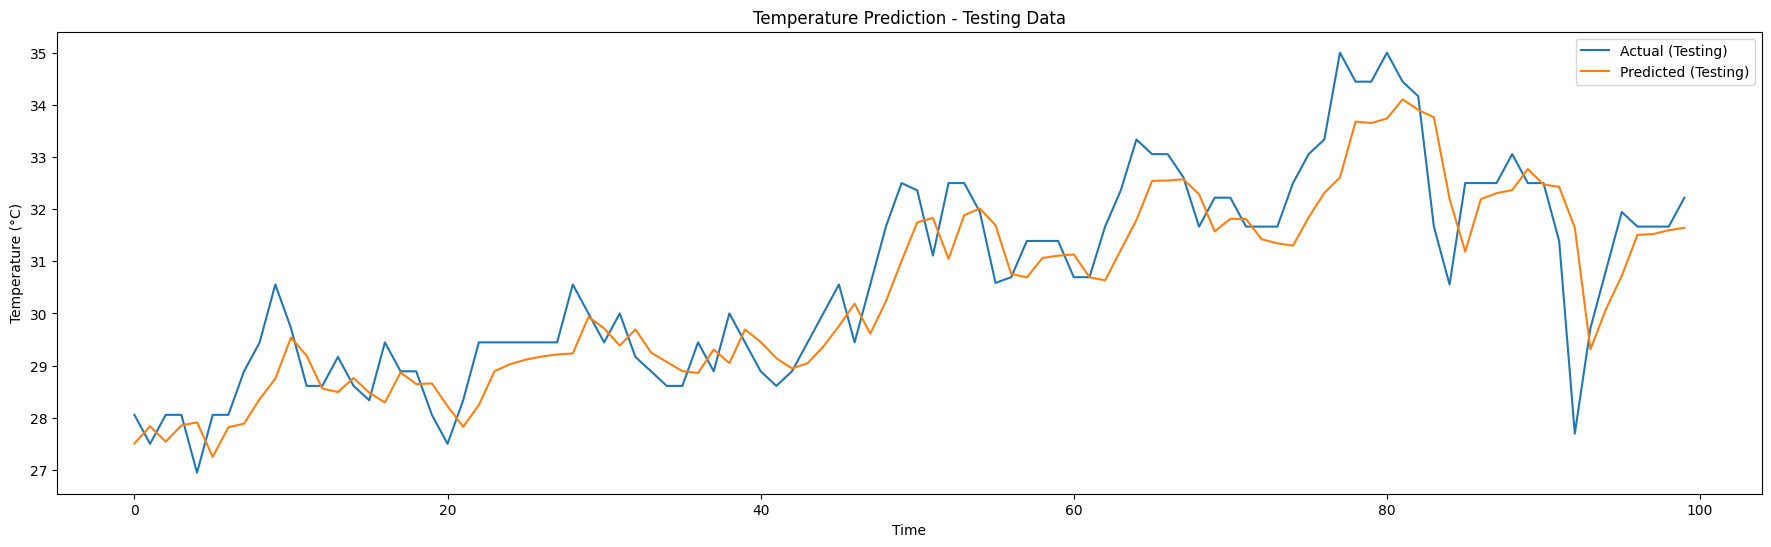

In [45]:

# Plotting training data
plt.figure(figsize=(22, 6))
plt.plot(y_train_transformed[-100:], label='Actual (Training)')
plt.plot(y_train_pred_transformed[-100:], label='Predicted (Training)')
plt.title('Temperature Prediction - Training Data')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
#----------------------------------------------------------------------------
# Plotting testing data
plt.figure(figsize=(22, 6))
plt.plot(y_test_transformed[-100:], label='Actual (Testing)')
plt.plot(y_test_pred_transformed[-100:], label='Predicted (Testing)')
plt.title('Temperature Prediction - Testing Data')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


__4.6 Predicting the Temperature for Next 365 days:__

In [52]:
#Import necessary libraries
from datetime import datetime, timedelta

In [53]:
#Function for predicting Feature Temperature
def temperature_prediction(days,scaled_data):
    x_input=scaled_data[-365:]
    x_input = x_input.reshape( 1,-1)
    #-----------------------------------------------
    temp_input = list(x_input)
    temp_input = temp_input[0].tolist()
    #-----------------------------------------------
    lst_output=[]
    n_steps=365
    i=0
    while(i<days):
        if(len(temp_input)>365):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps,1))
            yhat = bilstm_model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = bilstm_model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i=i+1
    future_predictions =np.array(lst_output)
    future_predictions = mm_scaler.inverse_transform(np.array(lst_output))
    #----------------------------------------------------------------------------
    #Date
    start_date = datetime.strptime("2024-05-24", "%Y-%m-%d")
    upcoming_dates = []
    for i in range(days):
        next_date = start_date + timedelta(days=i)
        upcoming_dates.append(next_date.strftime("%Y-%m-%d"))
    #-------------------------------------------------------------------------------------
    df_future_prediction=pd.DataFrame({'date': upcoming_dates,'avg_temperature_(celcius)': future_predictions.reshape(-1)})
    df_future_prediction['date'] = pd.to_datetime(df_future_prediction['date'])
    df_future_prediction.set_index('date', inplace=True)
    return df_future_prediction
#----------------------------------------------------------------------------------------------------------
forcasting_days=365
df_future_prediction=temperature_prediction(forcasting_days,scaled_data)

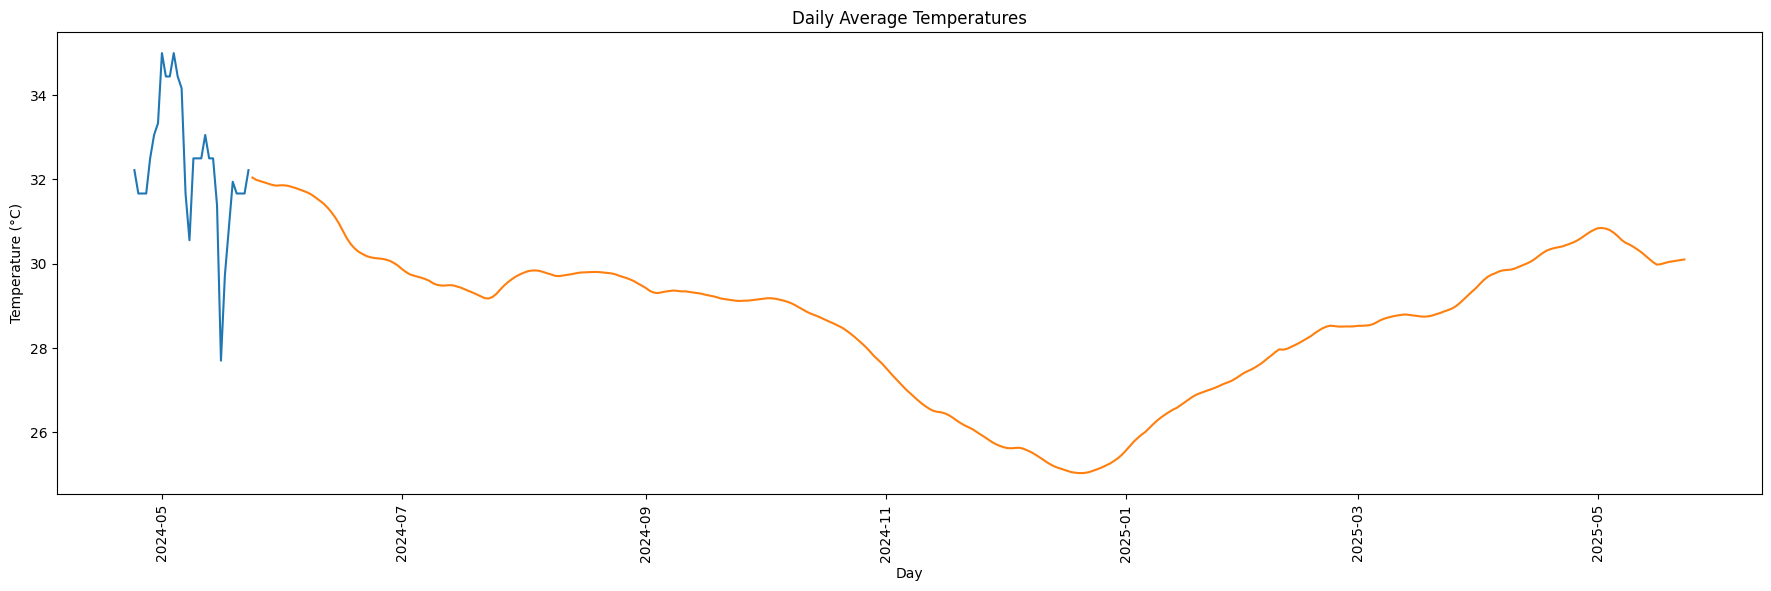

In [54]:
plt.figure(figsize=(22, 6))
plt.plot(test_data.index[-30:], test_data["avg_temperature_(celcius)"].iloc[-30:])
plt.plot(df_future_prediction.index,df_future_prediction["avg_temperature_(celcius)"])
plt.title('Daily Average Temperatures')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=90)
# plt.xticks(test_data.index[-30:], test_data.index[-30:].strftime('%Y-%m-%d'), rotation=90)
# plt.xticks(df_future_prediction.index, df_future_prediction.index.strftime('%Y-%m-%d'), rotation=90)
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 __Observations:__

- By analyzing the temperature predictions over one year, it is evident that the model is able to capture the seasonal patterns effectively.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

__4.7 Loading the Saved Model:__

In [55]:
def create_bilstm_model():
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(365, 1)))
        model.add(Dropout(0.2))
        model.add(Bidirectional(LSTM(50, activation='relu')))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        #------------------------------------------------------------------------------------------------------------
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
saved_bilstm_model = create_bilstm_model()
# Loading the saved weights
checkpoint_filepath = 'bilstm_model_checkpoint.weights.h5'
saved_bilstm_model.load_weights(checkpoint_filepath)

__4.8 Predicting the Temperature on Particular Date:__

In [60]:

def temperature_prediction(target_date, scaled_data, blstm_model, mm_scaler):

    last_known_date = datetime.strptime("2024-05-23", "%Y-%m-%d")
    #-------------------------------------------------------------------------------------------------
    #Converting entered target date to datetime format
    target_date = datetime.strptime(target_date, "%d-%m-%Y")
    #-------------------------------------------------------------------------------------------------
    #Converting the date difference into days
    days = (target_date - last_known_date).days
    #-------------------------------------------------------------------------------------------------
    if days < 0:
        raise ValueError("Target date must be after the last known date.")
    
    if days == 0:
        raise ValueError("Target date is the same as the last known date. No prediction needed.")
    #-------------------------------------------------------------------------------------------------
    x_input = scaled_data[-365:]
    x_input = x_input.reshape(1, -1)
    temp_input = list(x_input[0])
    lst_output = []
    n_steps = 365
    i = 0
    #-------------------------------------------------------------------------------------------------
    while i < days:
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[-n_steps:])
            x_input = x_input.reshape((1, n_steps, 1))
        else:
            x_input = np.array(temp_input)
            x_input = x_input.reshape((1, len(temp_input), 1))
        #------------------------------------------------------------
        yhat = saved_bilstm_model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i += 1

    if len(lst_output) == 0:
        raise ValueError("No predictions generated. Check the input data and model.")
    
    future_predictions = np.array(lst_output).reshape(-1, 1)
    future_predictions = mm_scaler.inverse_transform(future_predictions)
    predicted_temperature = future_predictions[-1][0]
    return predicted_temperature
#----------------------------------------------------------------------------------------------------------
target_date= str(input("Enter the date (Format DD-MM-YY)"))
#----------------------------------------------------------------------------------------------------------
predicted_temp = temperature_prediction(target_date, scaled_data, saved_bilstm_model, mm_scaler)
print(f"Predicted Average Temperature of Chennai on {target_date}: {predicted_temp:.2f} °C")

Predicted Average Temperature of Chennai on 30-05-2024: 31.97 °C
